In [1]:
import numpy as np
from AniMAIRE import AniMAIRE
import datetime as dt

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/chrisswdavis/.local/lib/python3.8/site-packages/spacepy/time.py:2367: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/chrisswdavis/.local/lib/python3.8/site-packages/numba/core/ir_utils.py:2172: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'params_to_use' of function 'sum_yield_values'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "AniMAIRE/anisotropic_MAIRE_engine/singleParticleEngineInstance.py", line 121:
@njit
def sum_yield_values(params_to_use, R_value):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


## Creating an Anisotropic Map

In [24]:
sigma = np.sqrt(0.19)
pitch_angle_reference_latitude = -17.0
pitch_angle_reference_longitude = 148.0

test_pitch_angle_dist_function = lambda pitch_angle,rigidity:np.exp(-(pitch_angle**2)/(sigma**2))

test_anisotropic_dose_rates = AniMAIRE.run_from_spectra(
        proton_rigidity_spectrum=lambda x:2.56*(x**-3.41),
        proton_pitch_angle_distribution=test_pitch_angle_dist_function,
        reference_pitch_angle_latitude=pitch_angle_reference_latitude,reference_pitch_angle_longitude=pitch_angle_reference_longitude,
        Kp_index=3,
        date_and_time=dt.datetime(2006, 12, 13, 3, 0),
)

/home/chrisswdavis/.local/lib/python3.8/site-packages/spacepy/coordinates.py:248: DeprecationWarning: No coordinate backend specified; using SpacePy. This default changed from IRBEM in version 0.4.0
  warnings.warn('No coordinate backend specified; using SpacePy.'


running MAGNETOCOSMICS to acquire asymptotic directions...
assigning asymptotic coordinates
acquiring pitch angles...
debug mode being used: setting AniMAIRE to use progress_apply rather than running in parallel!


100%|██████████| 687312/687312 [01:01<00:00, 11165.23it/s]


successfully converted asymptotic directions
assigning pitch angle weighting factors...
calculating pitch angle weighting factors...
debug mode being used: setting AniMAIRE to use progress_apply rather than running in parallel!


 27%|██▋       | 182937/687312 [00:17<00:47, 10522.32it/s]


In [3]:
test_anisotropic_dose_rates.head()

,latitude,longitude,altitude (km),edose,adose,dosee,tn1,tn2,tn3,SEU,SEL
0,-90.0,0.0,0.0000,1.976895e-07,2.027961e-07,3.222401e-07,1.286575e-08,7.877480e-09,5.401425e-09,7.877480e-22,7.877480e-17
1,-90.0,0.0,3.0480,4.838923e-07,4.869626e-07,7.032983e-07,7.429541e-08,4.866265e-08,3.410940e-08,4.866265e-21,4.866265e-16
2,-90.0,0.0,6.0960,1.453834e-06,1.411544e-06,2.045308e-06,2.472576e-07,1.611648e-07,1.136527e-07,1.611648e-20,1.611648e-15
3,-90.0,0.0,7.6200,2.352658e-06,2.382057e-06,3.304989e-06,3.720997e-07,2.420436e-07,1.708843e-07,2.420436e-20,2.420436e-15
4,-90.0,0.0,8.5344,2.970462e-06,2.791970e-06,4.201789e-06,4.473736e-07,2.919136e-07,2.063902e-07,2.919136e-20,2.919136e-15


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEU (Upsets/hr/Gb)"] = heatmap_DF_to_Plot["SEU"] * (60.0 * 60.0) * 1e9
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEL (Latch-ups/hr/device)"] = heatmap_DF_to_Plot["SEL"] * (60.0 * 60.0)
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:225: SettingWithCopyWarning: 
A value is trying to be set o

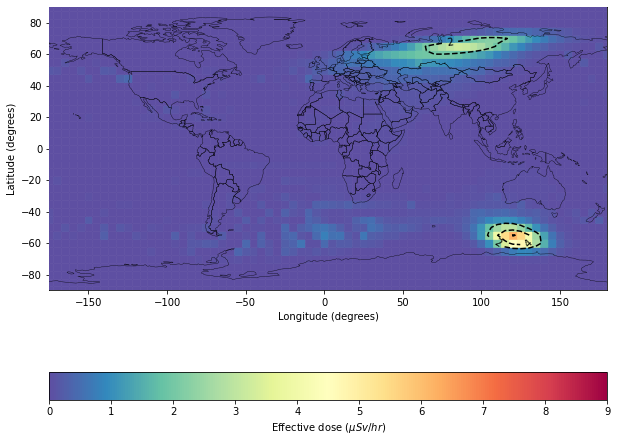

In [23]:
AniMAIRE.plot_dose_map(test_anisotropic_dose_rates.query("`altitude (km)` == 12.1920"),
                                         hue_range=(0,9))

plt.savefig("Anisotropic_40kft_example.svg",bbox_inches="tight")
plt.savefig("Anisotropic_40kft_example.png",dpi=300,bbox_inches="tight")

## Creating an Isotropic Map

In [2]:
test_isotropic_dose_rates = AniMAIRE.run_from_spectra(
        proton_rigidity_spectrum=lambda x:2.56*(x**-3.41),
        Kp_index=3,
        date_and_time=dt.datetime(2006, 12, 13, 3, 0),
)

running MAGNETOCOSMICS to acquire asymptotic directions...
assigning asymptotic coordinates
acquiring pitch angles...


successfully converted asymptotic directions
assigning pitch angle weighting factors...
calculating pitch angle weighting factors...


calculating rigidity weighting factors...


calculating rigidity + pitch combined weighting factors...


calculating energy + pitch combined weighting factors...
converting spectra and asymptotic directions to particle fluxes and dose rates...


output dose rates calculated successfully!
Success!


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/anisotropic_MAIRE_engine/singleParticleEngineInstance.py:276: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sortedOutputDoseRates.weighting_factor_input_DF = df_with_weighting_factors


In [10]:
test_isotropic_dose_rates.head()

,latitude,longitude,altitude (km),edose,adose,dosee,tn1,tn2,tn3,SEU,SEL
0,-90.0,0.0,0.0000,0.010442,0.012540,0.010010,0.004437,0.002729,0.001828,2.729229e-16,2.729229e-11
1,-90.0,0.0,3.0480,0.101786,0.117658,0.085755,0.051895,0.033617,0.022979,3.361684e-15,3.361684e-10
2,-90.0,0.0,6.0960,0.672702,0.742332,0.457695,0.326731,0.211853,0.145046,2.118530e-14,2.118530e-09
3,-90.0,0.0,7.6200,1.442377,1.541670,0.975436,0.665785,0.431261,0.295516,4.312608e-14,4.312608e-09
4,-90.0,0.0,8.5344,2.165860,2.249419,1.426324,0.964791,0.623291,0.426927,6.232913e-14,6.232913e-09


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEU (Upsets/hr/Gb)"] = heatmap_DF_to_Plot["SEU"] * (60.0 * 60.0) * 1e9
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEL (Latch-ups/hr/device)"] = heatmap_DF_to_Plot["SEL"] * (60.0 * 60.0)
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:225: SettingWithCopyWarning: 
A value is trying to be set o

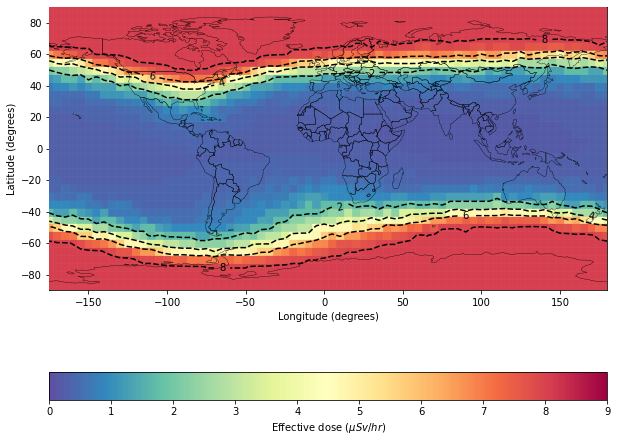

In [21]:
AniMAIRE.plot_dose_map(test_isotropic_dose_rates.query("`altitude (km)` == 12.1920"),
                                         hue_range=(0,9))

plt.savefig("Isotropic_40kft_example.svg",bbox_inches="tight")
plt.savefig("Isotropic_40kft_example.png",dpi=300,bbox_inches="tight")

## Generating dose rates due to cosmic rays

In [4]:
test_cosmic_ray_dose_rates = AniMAIRE.run_from_DLR_cosmic_ray_model(OULU_count_rate_in_seconds=106.54,
                                      Kp_index=3,
				                      date_and_time=dt.datetime(2006, 12, 13, 3, 0))

running MAGNETOCOSMICS to acquire asymptotic directions...
assigning asymptotic coordinates
acquiring pitch angles...


successfully converted asymptotic directions
assigning pitch angle weighting factors...
calculating pitch angle weighting factors...


calculating rigidity weighting factors...


calculating rigidity + pitch combined weighting factors...


calculating energy + pitch combined weighting factors...
converting spectra and asymptotic directions to particle fluxes and dose rates...


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/anisotropic_MAIRE_engine/singleParticleEngineInstance.py:276: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sortedOutputDoseRates.weighting_factor_input_DF = df_with_weighting_factors


output dose rates calculated successfully!
assigning pitch angle weighting factors...
calculating pitch angle weighting factors...


calculating rigidity weighting factors...


calculating rigidity + pitch combined weighting factors...


calculating energy + pitch combined weighting factors...
converting spectra and asymptotic directions to particle fluxes and dose rates...































































































































































output dose rates calculated successfully!
Success!


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/anisotropic_MAIRE_engine/singleParticleEngineInstance.py:276: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sortedOutputDoseRates.weighting_factor_input_DF = df_with_weighting_factors


In [17]:
test_cosmic_ray_dose_rates.head()

,latitude,longitude,altitude (km),edose,adose,dosee,tn1,tn2,tn3,SEU,SEL
0,-90.0,0.0,0.0000,0.070523,0.074779,0.105375,0.008118,0.004984,0.003417,6.697111e-16,6.697111e-11
1,-90.0,0.0,3.0480,0.296067,0.308723,0.316070,0.068962,0.044821,0.031155,6.128937e-15,6.128937e-10
2,-90.0,0.0,6.0960,1.323990,1.309065,1.215236,0.320420,0.208996,0.145856,2.894982e-14,2.894982e-09
3,-90.0,0.0,7.6200,2.457785,2.382526,2.173448,0.564336,0.367764,0.257271,5.131596e-14,5.131596e-09
4,-90.0,0.0,8.5344,3.381634,3.148411,2.930001,0.749637,0.488290,0.342016,6.837349e-14,6.837349e-09


/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEU (Upsets/hr/Gb)"] = heatmap_DF_to_Plot["SEU"] * (60.0 * 60.0) * 1e9
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_DF_to_Plot["SEL (Latch-ups/hr/device)"] = heatmap_DF_to_Plot["SEL"] * (60.0 * 60.0)
/home/chrisswdavis/AniMAIRE-public/AniMAIRE/AniMAIRE.py:225: SettingWithCopyWarning: 
A value is trying to be set o

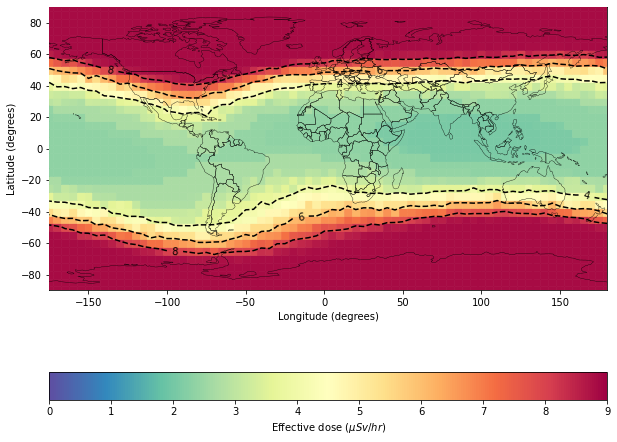

In [22]:
AniMAIRE.plot_dose_map(test_cosmic_ray_dose_rates.query("`altitude (km)` == 12.1920"),
                                         hue_range=(0,9))

plt.savefig("Cosmic_ray_40kft_example.svg",bbox_inches="tight")
plt.savefig("Cosmic_ray_40kft_example.png",dpi=300,bbox_inches="tight")